**Instructor**: Prof. Keith Chugg (chugg@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_line(x, y, weights):
    X_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_line = weights[1] + weights[0] * X_line
    plt.scatter(x, y, color='black', label='Data')
    plt.plot(X_line, y_line, color='red', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [3]:
readDataPath = './readData/'
data = np.loadtxt(readDataPath + '2d_linregress_data.csv',delimiter = ',')
x = data[:-1,:].T
y = data[-1:,:].T
assert x.shape == y.shape, f'Shape mismatch between X and Y'

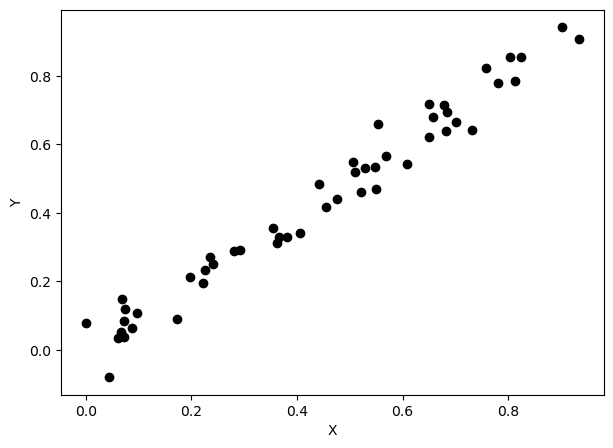

In [4]:
fig,ax = plt.subplots(figsize=(7,5))
_=ax.plot(x,y, 'ok')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

### Gradient Descent

In [ ]:
def gradient_descent(x, y, weight, learning_rate, num_iterations):
    cost_history = []
    weight_history = []
    for iter in range(num_iterations):
      predictions = np.matmul(x, weight)
      residuals = predictions - y
      gradient = (2/len(residuals))*np.matmul(x.T, residuals)
      weight -= learning_rate*gradient
      cost = np.mean(residuals**2)
      cost_history.append(cost)
      weight_history.append(weight)
    return cost_history, weight_history

In [6]:
num_iterations = 100

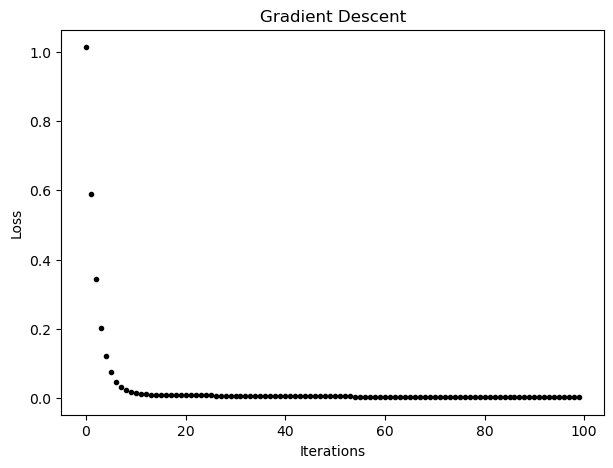

In [7]:
weight_initial = np.array([[1.0], [1.0]])

x_dot = np.c_[x, np.ones((len(x), 1))]

learning_rate = 0.1
cost_history, weight_history = gradient_descent(x_dot, y, weight_initial, learning_rate, num_iterations)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.set_title('Gradient Descent')
_=ax.plot(range(num_iterations),cost_history,'k.')

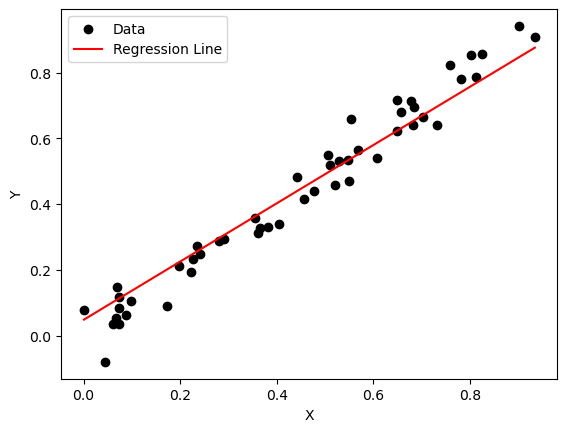

In [8]:
plot_line(x, y, weight_history[-1])

### Stochastic Gradient Descent

In [9]:
def stochastic_gradient_descent(x, y, weight, learning_rate, iterations):

    cost_history = []
    weight_history = []
    for iter in range(iterations):
      choice = np.random.randint(0, len(y))
      sampled_x = x[choice].reshape(1, x.shape[1])
      sampled_y = y[choice].reshape(1,1)

      predictions = np.matmul(sampled_x, weight)
      residuals = predictions - sampled_y
      gradient = (2/len(residuals))*np.matmul(sampled_x.T, residuals)
      weight -= learning_rate*gradient
      cost = np.mean(residuals**2)
      cost_history.append(cost)
      weight_history.append(weight)
    return cost_history, weight_history

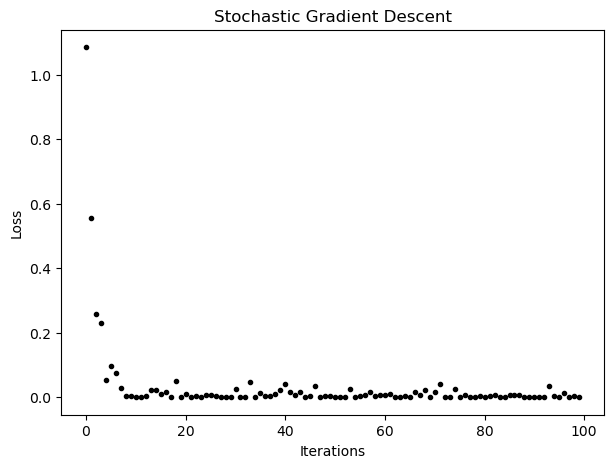

In [10]:
weight_initial = np.array([[1.0], [1.0]])

x_dot = np.c_[x, np.ones((len(x), 1))]

cost_history, weight_history = stochastic_gradient_descent(x_dot, y, weight_initial, learning_rate, num_iterations)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.set_title('Stochastic Gradient Descent')
_=ax.plot(range(num_iterations),cost_history,'k.')

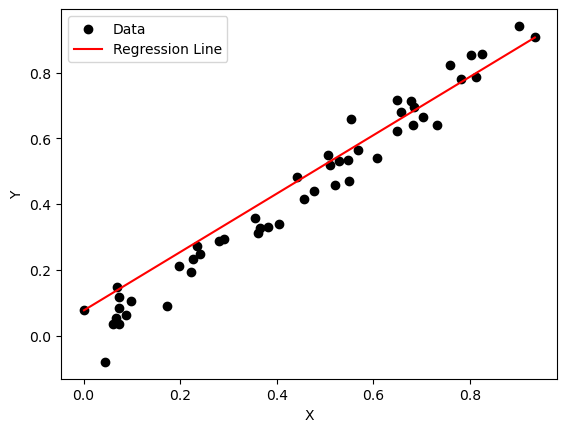

In [11]:
plot_line(x, y, weight_history[-1])

### Mini-Batch Gradient Descent

In [12]:
def minibatch_gradient_descent(X, y, weight, learning_rate, num_iterations, batch_size):

    cost_history = []
    weight_history = []

    for iter in range(num_iterations):
      choices = np.random.randint(low=0, high = X.shape[0], size = batch_size)
      sampled_xs = X[choices]
      sampled_ys = y[choices]

      predictions = np.matmul(sampled_xs, weight)
      residuals = predictions - sampled_ys
      gradient = (2/len(residuals))*np.matmul(sampled_xs.T, residuals)
      weight -= learning_rate*gradient
      cost = np.mean(residuals**2)
      cost_history.append(cost)
      weight_history.append(weight)

    return cost_history, weight_history

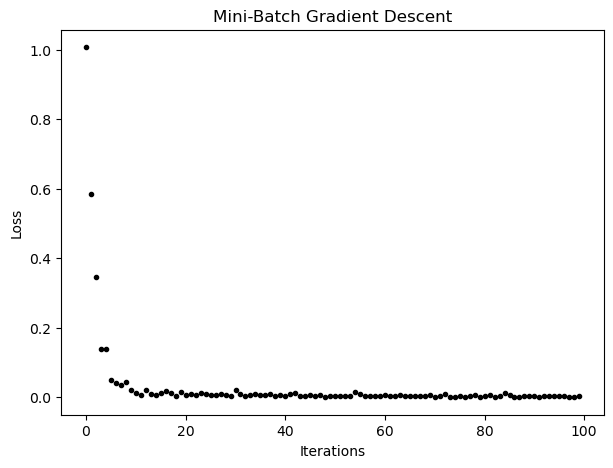

In [13]:
weight_initial = np.array([[1.0], [1.0]])

batch_size = 5

x_dot = np.c_[x, np.ones((len(x), 1))]

cost_history, weight_history = minibatch_gradient_descent(x_dot, y, weight_initial, learning_rate, num_iterations, batch_size = batch_size)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('Loss')
ax.set_xlabel('Iterations')
ax.set_title('Mini-Batch Gradient Descent')
_=ax.plot(range(num_iterations),cost_history,'k.')

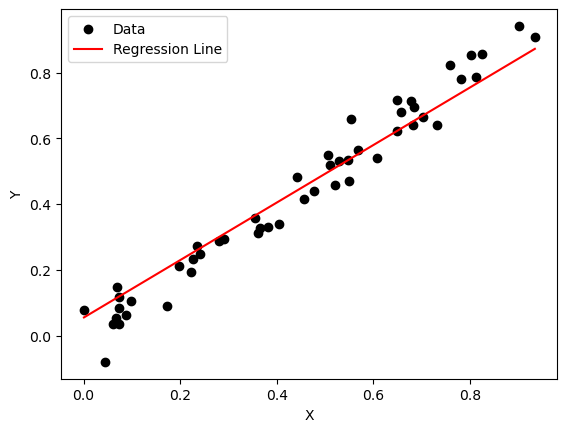

In [14]:
plot_line(x, y, weight_history[-1])